In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from scipy.signal import find_peaks
from sklearn.preprocessing import minmax_scale

In [4]:
# Cook some sample data
time_points = np.arange(0,24,2)
period = 24
amplitude = 2
phase_shift = np.random.uniform(0, period)
data =  amplitude * np.sin(2 * np.pi * (np.array(time_points) - phase_shift) / period)

# Add some noise
noise_level = np.random.normal(amplitude/10, amplitude)
data += np.random.normal(0, noise_level, len(data))

# Normalize the data
data = minmax_scale(data)

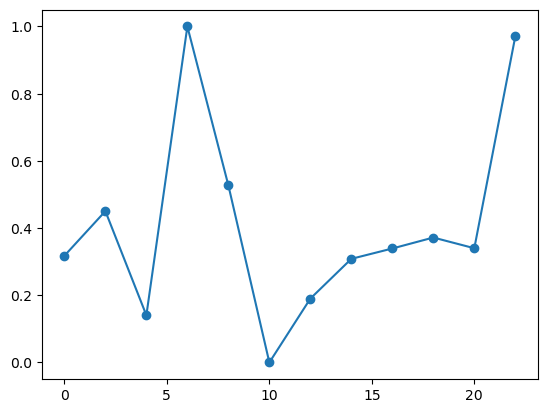

In [5]:
# Plot the data
plt.plot(time_points, data, 'o-')

In [6]:
# Fit an AR model
model = AutoReg(data, lags=5)
fitted_model = model.fit()

In [7]:
# Generate Spectral Density
n_points = len(data)
frequencies = np.fft.fftfreq(n_points,1)
# positive_frequencies = frequencies[:n_points//2]
psd = np.abs(np.fft.fft(fitted_model.resid))**2

In [10]:
# Find peaks in the spectral density
peaks, _ = find_peaks(psd)
peak_frequencies = frequencies[peaks]
# psd = psd[:n_points//2]

Text(0, 0.5, 'Power')

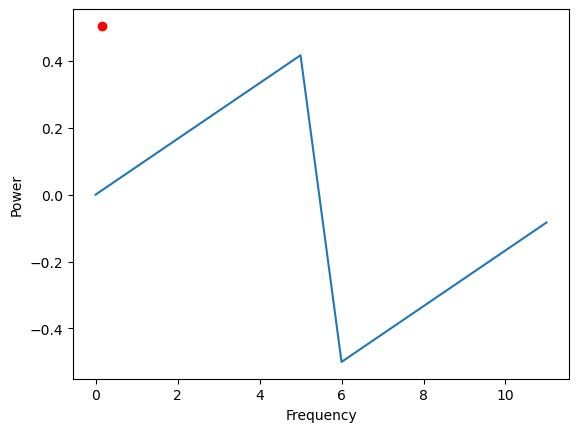

In [14]:
# Plot the spectral density
plt.plot(frequencies, label='Spectral Density')
plt.scatter(peak_frequencies, psd[peaks], color='red', label='Peaks')
plt.xlabel('Frequency')
plt.ylabel('Power')